# Install and import the necessary libaries

In [2]:
!pip install -q ultralytics
!pip install -q ipywidgets

In [4]:
from IPython.display import display
from ultralytics import YOLO
import cv2
import matplotlib.pyplot as plt
import numpy as np
import os
import yaml

# Initialize the pretrained Yolo v8 model

In [5]:
# model = YOLO("yolov8x.pt")           
model = YOLO('yolov8x.pt')  #Initialize the pretrained model
data_dir = ('/kaggle/working/manhwa_data/')    # Directory for the Dataset folder
HOME = os.getcwd()

In [6]:
print(len(model.names))     # THe number of inital classes in the pretrained model

80


# Create the yaml file for dataset

In [7]:
# Dataset Structure
#     |- train
#         |-images
#             |- img1.jpg
#             |- img2.jpg
#         |-labels
#             |- img1.txt
#             |- img2.txt
#     |- valid    #Similar to train
#     |- Test     #Similar to train
#     |- data.yaml

yaml_file = os.path.normpath(data_dir + 'data.yaml')

data = {'train':  os.path.normpath(data_dir + 'train/images'),
        'val':  os.path.normpath(data_dir + 'valid/images'),
        'test':  os.path.normpath(data_dir + 'test/images'),
        'nc': 3,
        'names': ['bg_text', 'bubble', 'onomatopoeia']
        }

# overwrite the data to the .yaml file
with open(yaml_file, 'w') as f:
    yaml.dump(data, f)

# read the content in .yaml file
with open(yaml_file, 'r') as f:
    file = yaml.safe_load(f)
    display(file)

{'names': ['bg_text', 'bubble', 'onomatopoeia'],
 'nc': 3,
 'test': '/kaggle/working/manhwa_data/test/images',
 'train': '/kaggle/working/manhwa_data/train/images',
 'val': '/kaggle/working/manhwa_data/valid/images'}

# Train the Model

In [8]:
os.environ['WANDB_DISABLED'] = 'true'
model.train(
    data=yaml_file,
    epochs=40, 
    batch=34,
    device =[0,1]
    )   #All the hyperparameters depend on the user's system

Ultralytics YOLOv8.0.223 🚀 Python-3.10.12 torch-2.0.0 CUDA:0 (Tesla T4, 15110MiB)
                                                       CUDA:1 (Tesla T4, 15110MiB)
engine/trainer: task=detect, mode=train, model=yolov8x.pt, data=/kaggle/working/manhwa_data/data.yaml, epochs=40, patience=50, batch=34, imgsz=640, save=True, save_period=-1, cache=False, device=[0, 1], workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, show=False, save_frames=False, save_txt=False, save_conf=False, save_cro

2023-12-07 01:58:38,586	INFO util.py:129 -- Outdated packages:
  ipywidgets==7.7.1 found, needs ipywidgets>=8
Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.
2023-12-07 01:58:39,198	INFO util.py:129 -- Outdated packages:
  ipywidgets==7.7.1 found, needs ipywidgets>=8
Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.
/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Overriding model.yaml nc=80 with nc=3

                   from  n    params  module                                       arguments                     
  0                  -1  1      2320  ultralytics.nn.modules.conv.Conv             [3, 80, 3, 2]                 
  1                  -1  1    115520  ultralytics.nn.modules.conv.Conv             [80, 160, 3, 2]               
  2                  -1  3    436800  ultralytics.nn.modules.block.C2f             [160, 160, 3, True]           
  3                  -1  1    461440  ultralytics.nn.modules.conv.Conv             [160, 320, 3, 2]              
  4                  -1  6   3281920  ultralytics.nn.modules.block.C2f             [320, 320, 6, True]           
  5                  -1  1   1844480  ultralytics.nn.modules.conv.Conv             [320, 640, 3, 2]              
  6                  -1  6  13117440  ultralytics.nn.modules.block.C2f             [640, 640, 6, True]           
  7                  -1  1   3687680  ultralytics

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


TensorBoard: Start with 'tensorboard --logdir runs/detect/train', view at http://localhost:6006/


wandb: Tracking run with wandb version 0.16.0
wandb: W&B syncing is set to `offline` in this directory.  
wandb: Run `wandb online` or set WANDB_MODE=online to enable cloud syncing.


Overriding model.yaml nc=80 with nc=3
Transferred 589/595 items from pretrained weights
Freezing layer 'model.22.dfl.conv.weight'
AMP: running Automatic Mixed Precision (AMP) checks with YOLOv8n...
AMP: checks passed ✅


train: Scanning /kaggle/working/manhwa_data/train/labels.cache... 4804 images, 0 backgrounds, 0 corrupt: 100%|██████████| 4804/4804 [00:00<?, ?it/s]


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


val: Scanning /kaggle/working/manhwa_data/valid/labels.cache... 825 images, 0 backgrounds, 0 corrupt: 100%|██████████| 825/825 [00:00<?, ?it/s]
/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000714, momentum=0.9) with parameter groups 97 weight(decay=0.0), 104 weight(decay=0.00053125), 103 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 4 dataloader workers
Logging results to runs/detect/train
Starting training for 40 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/40      13.8G      1.047      1.331      1.322         18        640: 100%|██████████| 142/142 [03:20<00:00,  1.41s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:26<00:00,  1.07s/it]


                   all        825       3260      0.554      0.451      0.457      0.289

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/40      14.3G      1.035      1.008      1.291         32        640: 100%|██████████| 142/142 [03:14<00:00,  1.37s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:26<00:00,  1.07s/it]


                   all        825       3260      0.721      0.672      0.703      0.503

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/40        14G     0.9857     0.8937      1.257         43        640: 100%|██████████| 142/142 [03:12<00:00,  1.36s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:26<00:00,  1.07s/it]


                   all        825       3260      0.638      0.568      0.582      0.405

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/40        14G     0.9728     0.8903       1.24         32        640: 100%|██████████| 142/142 [03:12<00:00,  1.36s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:26<00:00,  1.07s/it]


                   all        825       3260      0.769      0.653      0.723      0.525

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/40        14G     0.9249     0.8199      1.211         25        640: 100%|██████████| 142/142 [03:12<00:00,  1.36s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:26<00:00,  1.07s/it]


                   all        825       3260      0.785      0.723      0.791      0.594

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/40        14G     0.9014     0.7666      1.191         33        640: 100%|██████████| 142/142 [03:12<00:00,  1.36s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:26<00:00,  1.07s/it]


                   all        825       3260      0.806      0.779      0.833      0.636

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/40        14G     0.8912      0.732      1.186         24        640: 100%|██████████| 142/142 [03:11<00:00,  1.35s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:26<00:00,  1.07s/it]


                   all        825       3260      0.842      0.829      0.874       0.67

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/40        14G     0.8501      0.691      1.164         25        640: 100%|██████████| 142/142 [03:12<00:00,  1.35s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:26<00:00,  1.07s/it]


                   all        825       3260      0.851      0.844      0.884      0.679

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/40        14G     0.8429     0.6738      1.155         27        640: 100%|██████████| 142/142 [03:12<00:00,  1.35s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:26<00:00,  1.07s/it]


                   all        825       3260      0.847      0.851      0.894      0.699

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/40        14G     0.8156     0.6317      1.129         31        640: 100%|██████████| 142/142 [03:12<00:00,  1.35s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:26<00:00,  1.07s/it]


                   all        825       3260      0.867      0.855      0.899       0.71

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/40        14G     0.8048     0.6271      1.135         19        640: 100%|██████████| 142/142 [03:12<00:00,  1.35s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:26<00:00,  1.08s/it]


                   all        825       3260      0.881       0.85      0.908      0.721

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/40        14G     0.7911     0.6041      1.121         35        640: 100%|██████████| 142/142 [03:12<00:00,  1.35s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:26<00:00,  1.07s/it]


                   all        825       3260      0.871      0.856      0.904      0.718

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/40        14G     0.7787     0.5973      1.112         35        640: 100%|██████████| 142/142 [03:12<00:00,  1.35s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:26<00:00,  1.08s/it]


                   all        825       3260      0.893      0.868      0.914      0.725

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/40        14G     0.7685     0.5884      1.106         39        640: 100%|██████████| 142/142 [03:12<00:00,  1.35s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:26<00:00,  1.07s/it]


                   all        825       3260      0.885      0.887      0.933      0.752

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/40        14G     0.7466     0.5619      1.094         23        640: 100%|██████████| 142/142 [03:12<00:00,  1.35s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:26<00:00,  1.07s/it]


                   all        825       3260      0.883      0.892      0.931      0.754

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/40        14G     0.7401     0.5501       1.09         29        640: 100%|██████████| 142/142 [03:11<00:00,  1.35s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:26<00:00,  1.07s/it]


                   all        825       3260      0.887      0.904      0.939      0.765

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/40        14G     0.7155     0.5317      1.072         48        640: 100%|██████████| 142/142 [03:12<00:00,  1.35s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:26<00:00,  1.07s/it]


                   all        825       3260      0.888      0.891      0.933      0.749

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/40        14G     0.7195     0.5275      1.068         38        640: 100%|██████████| 142/142 [03:11<00:00,  1.35s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:26<00:00,  1.07s/it]


                   all        825       3260      0.915      0.884      0.938      0.775

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/40        14G     0.7133     0.5177      1.073         27        640: 100%|██████████| 142/142 [03:11<00:00,  1.35s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:26<00:00,  1.07s/it]


                   all        825       3260      0.911      0.902      0.949      0.782

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/40        14G     0.6988     0.5098      1.066         33        640: 100%|██████████| 142/142 [03:12<00:00,  1.35s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:26<00:00,  1.07s/it]


                   all        825       3260       0.91      0.902      0.952      0.791

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/40        14G     0.6963     0.4959      1.063         43        640: 100%|██████████| 142/142 [03:12<00:00,  1.35s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:26<00:00,  1.07s/it]


                   all        825       3260      0.898       0.91      0.951      0.789

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/40        14G     0.6833     0.4921      1.053         30        640: 100%|██████████| 142/142 [03:12<00:00,  1.35s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:26<00:00,  1.07s/it]


                   all        825       3260      0.932      0.905      0.959      0.802

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/40        14G     0.6654     0.4783      1.045         22        640: 100%|██████████| 142/142 [03:12<00:00,  1.35s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:26<00:00,  1.07s/it]


                   all        825       3260      0.907      0.925      0.959      0.804

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/40        14G     0.6547     0.4684      1.037         17        640: 100%|██████████| 142/142 [03:12<00:00,  1.35s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:26<00:00,  1.07s/it]


                   all        825       3260      0.916      0.909      0.955      0.792

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/40        14G     0.6561     0.4647      1.035         34        640: 100%|██████████| 142/142 [03:12<00:00,  1.35s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:26<00:00,  1.08s/it]


                   all        825       3260       0.92      0.915      0.962      0.815

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/40        14G     0.6295     0.4503      1.023         32        640: 100%|██████████| 142/142 [03:12<00:00,  1.35s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:26<00:00,  1.07s/it]


                   all        825       3260      0.916      0.921      0.959      0.816

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/40        14G     0.6209     0.4448       1.02         27        640: 100%|██████████| 142/142 [03:12<00:00,  1.35s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:26<00:00,  1.07s/it]


                   all        825       3260      0.918       0.93      0.964      0.817

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/40        14G     0.6108     0.4353      1.023         20        640: 100%|██████████| 142/142 [03:12<00:00,  1.36s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:26<00:00,  1.07s/it]


                   all        825       3260       0.93      0.926      0.965      0.823

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/40        14G     0.6042     0.4268      1.007         49        640: 100%|██████████| 142/142 [03:12<00:00,  1.35s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:26<00:00,  1.07s/it]


                   all        825       3260      0.935      0.922      0.968      0.829

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/40        14G     0.5964     0.4222      1.007         28        640: 100%|██████████| 142/142 [03:12<00:00,  1.35s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:26<00:00,  1.07s/it]


                   all        825       3260      0.927      0.933      0.966      0.832
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/40      14.1G     0.5692     0.3611       1.01         12        640: 100%|██████████| 142/142 [03:13<00:00,  1.36s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:26<00:00,  1.08s/it]


                   all        825       3260      0.938      0.919      0.966      0.836

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/40        14G     0.5546     0.3559     0.9992         12        640: 100%|██████████| 142/142 [03:11<00:00,  1.35s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:26<00:00,  1.07s/it]


                   all        825       3260      0.941      0.924      0.969      0.843

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/40        14G     0.5515     0.3476     0.9967         25        640: 100%|██████████| 142/142 [03:11<00:00,  1.35s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:26<00:00,  1.07s/it]


                   all        825       3260      0.948      0.926      0.972      0.849

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/40      13.9G     0.5227     0.3351     0.9737         16        640: 100%|██████████| 142/142 [03:10<00:00,  1.34s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:26<00:00,  1.07s/it]


                   all        825       3260      0.942      0.922      0.972      0.854

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/40        14G     0.5185     0.3252      0.976         19        640: 100%|██████████| 142/142 [03:10<00:00,  1.34s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:26<00:00,  1.07s/it]


                   all        825       3260      0.941      0.931      0.971      0.854

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/40        14G     0.5077     0.3218     0.9691         20        640: 100%|██████████| 142/142 [03:10<00:00,  1.34s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:26<00:00,  1.07s/it]


                   all        825       3260      0.934      0.944      0.972       0.86

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/40        14G     0.4977     0.3106     0.9677         11        640: 100%|██████████| 142/142 [03:10<00:00,  1.34s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:26<00:00,  1.08s/it]


                   all        825       3260      0.941       0.94      0.975      0.865

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/40        14G     0.4884     0.3066     0.9612         24        640: 100%|██████████| 142/142 [03:11<00:00,  1.35s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:26<00:00,  1.08s/it]


                   all        825       3260      0.947      0.933      0.974      0.868

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/40        14G     0.4818     0.3019     0.9567         13        640: 100%|██████████| 142/142 [03:11<00:00,  1.35s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:26<00:00,  1.08s/it]


                   all        825       3260      0.937      0.942      0.974      0.866

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/40        14G     0.4559     0.2875     0.9438         16        640: 100%|██████████| 142/142 [03:11<00:00,  1.35s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:26<00:00,  1.07s/it]


                   all        825       3260      0.943       0.94      0.973       0.87

40 epochs completed in 2.499 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 136.7MB
Optimizer stripped from runs/detect/train/weights/best.pt, 136.7MB

Validating runs/detect/train/weights/best.pt...
Ultralytics YOLOv8.0.223 🚀 Python-3.10.12 torch-2.0.0 CUDA:0 (Tesla T4, 15110MiB)
                                                       CUDA:1 (Tesla T4, 15110MiB)
Model summary (fused): 268 layers, 68126457 parameters, 0 gradients, 257.4 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:30<00:00,  1.24s/it]


                   all        825       3260      0.943       0.94      0.973       0.87
               bg_text        825        480      0.915      0.956      0.973      0.899
                bubble        825       1612      0.961      0.969      0.991      0.934
          onomatopoeia        825       1168      0.953      0.893      0.956      0.778
Speed: 0.5ms preprocess, 28.9ms inference, 0.0ms loss, 1.1ms postprocess per image
Results saved to runs/detect/train


wandb:                                                                                
wandb: 
wandb: Run history:
wandb:                  lr/pg0 ▃▆████▇▇▇▇▇▆▆▆▆▆▅▅▅▅▅▅▄▄▄▄▄▃▃▃▃▃▂▂▂▂▂▁▁▁
wandb:                  lr/pg1 ▃▆████▇▇▇▇▇▆▆▆▆▆▅▅▅▅▅▅▄▄▄▄▄▃▃▃▃▃▂▂▂▂▂▁▁▁
wandb:                  lr/pg2 ▃▆████▇▇▇▇▇▆▆▆▆▆▅▅▅▅▅▅▄▄▄▄▄▃▃▃▃▃▂▂▂▂▂▁▁▁
wandb:        metrics/mAP50(B) ▁▄▃▅▆▆▇▇▇▇▇▇▇▇▇█▇▇██████████████████████
wandb:     metrics/mAP50-95(B) ▁▄▂▄▅▅▆▆▆▆▆▆▆▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇███████████
wandb:    metrics/precision(B) ▁▄▂▅▅▅▆▆▆▇▇▇▇▇▇▇▇▇▇▇▇█▇▇█▇▇█████████████
wandb:       metrics/recall(B) ▁▄▃▄▅▆▆▇▇��▇▇▇▇▇▇▇▇▇▇█▇██████████████████
wandb:            model/GFLOPs ▁
wandb:        model/parameters ▁
wandb: model/speed_PyTorch(ms) ▁
wandb:          train/box_loss ██▇▇▇▆▆▆▆▅▅▅▅▅▄▄▄▄▄▄▄▄▃▃▃▃▃▃▃▃▂▂▂▂▂▂▁▁▁▁
wandb:          train/cls_loss █▆▅▅▅▄▄▄▄▃▃▃▃▃▃▃▃▃▃▂▂▂▂▂▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁
wandb:          train/dfl_loss █▇▇▆▆▆▅▅▅▄▅▄▄▄▄▄▃▃▃▃▃▃▃▃▃▂▂▂▂▂▂▂▂▂▂▁▁▁▁▁
wandb:            val/box_loss █▅▅▅▄▄▄▃▃▃▃▃▃▃▃▃▃▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▁▁

# Evaluating the model

In [11]:
model = YOLO(os.path.normpath(os.path.join(HOME,'/runs/detect/train/weights/best.pt')))

In [13]:
!ls /kaggle/working/runs/detect/train

F1_curve.png					   train_batch1.jpg
PR_curve.png					   train_batch2.jpg
P_curve.png					   train_batch4260.jpg
R_curve.png					   train_batch4261.jpg
args.yaml					   train_batch4262.jpg
confusion_matrix.png				   val_batch0_labels.jpg
confusion_matrix_normalized.png			   val_batch0_pred.jpg
events.out.tfevents.1701914333.fb92e505cd85.347.0  val_batch1_labels.jpg
labels.jpg					   val_batch1_pred.jpg
labels_correlogram.jpg				   val_batch2_labels.jpg
results.csv					   val_batch2_pred.jpg
results.png					   weights
train_batch0.jpg


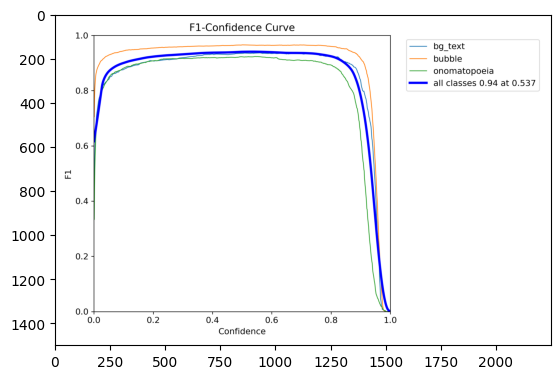

In [18]:
plt.imshow(cv2.cvtColor(cv2.imread('/kaggle/working/runs/detect/train/F1_curve.png'),cv2.COLOR_BGR2RGB))

In [14]:
metrics = model.val() # no arguments needed, dataset and settings remembered

Ultralytics YOLOv8.0.223 🚀 Python-3.10.12 torch-2.0.0 CUDA:0 (Tesla T4, 15110MiB)
Model summary (fused): 268 layers, 68126457 parameters, 0 gradients, 257.4 GFLOPs


val: Scanning /kaggle/working/manhwa_data/valid/labels.cache... 825 images, 0 backgrounds, 0 corrupt: 100%|██████████| 825/825 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 52/52 [00:54<00:00,  1.05s/it]


                   all        825       3260      0.944      0.939      0.973      0.871
               bg_text        825        480      0.915      0.956      0.973      0.899
                bubble        825       1612      0.961      0.969      0.991      0.934
          onomatopoeia        825       1168      0.954      0.892      0.956      0.779
Speed: 0.5ms preprocess, 57.1ms inference, 0.0ms loss, 2.3ms postprocess per image
Results saved to runs/detect/val


In [15]:
!ls /kaggle/working/runs/detect/val

F1_curve.png  confusion_matrix.png	       val_batch1_labels.jpg
PR_curve.png  confusion_matrix_normalized.png  val_batch1_pred.jpg
P_curve.png   val_batch0_labels.jpg	       val_batch2_labels.jpg
R_curve.png   val_batch0_pred.jpg	       val_batch2_pred.jpg


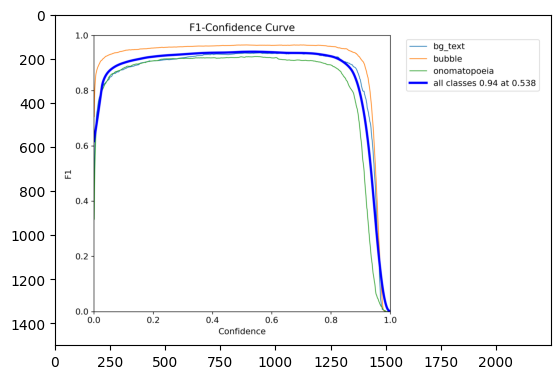

In [17]:
plt.imshow(cv2.cvtColor(cv2.imread('/kaggle/working/runs/detect/val/F1_curve.png'),cv2.COLOR_BGR2RGB))